<a href="https://colab.research.google.com/github/dollatrahul/Fungiclassification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
!pip install split-folders

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/defungi'
output='output'
splitfolders.ratio(input_folder,output=output,seed=42,ratio=(0.8,0.2))

Copying files: 9114 files [00:30, 298.53 files/s]


In [ ]:
IMAGE_SIZE=[224,224]

train_path='/content/output/train'
valid_path='/content/output/test'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/output/train/*')

In [ ]:
from keras.layers import Dropout

In [ ]:
x=Dropout(.2)
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)


In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_set=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_set=test_datagen.flow_from_directory('/content/output/val',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 7290 images belonging to 5 classes.
Found 1824 images belonging to 5 classes.


In [ ]:
hist=model.fit(train_set,
          validation_data=test_set,
          epochs=15,
          verbose=1)

Epoch 1/15
228/228 [==============================] - 41s 178ms/step - loss: 0.7033 - accuracy: 0.7134 - val_loss: 0.8168 - val_accuracy: 0.6765
Epoch 2/15
228/228 [==============================] - 40s 174ms/step - loss: 0.6381 - accuracy: 0.7425 - val_loss: 0.8558 - val_accuracy: 0.6689
Epoch 3/15
228/228 [==============================] - 40s 175ms/step - loss: 0.5902 - accuracy: 0.7671 - val_loss: 0.9215 - val_accuracy: 0.6601
Epoch 4/15
228/228 [==============================] - 40s 174ms/step - loss: 0.5606 - accuracy: 0.7798 - val_loss: 1.0287 - val_accuracy: 0.6491
Epoch 5/15
228/228 [==============================] - 42s 184ms/step - loss: 0.5536 - accuracy: 0.7835 - val_loss: 0.9565 - val_accuracy: 0.6513
Epoch 6/15
228/228 [==============================] - 42s 185ms/step - loss: 0.5240 - accuracy: 0.7952 - val_loss: 0.8719 - val_accuracy: 0.6634
Epoch 7/15
228/228 [==============================] - 42s 183ms/step - loss: 0.5184 - accuracy: 0.7977 - val_loss: 0.8297 - val_ac

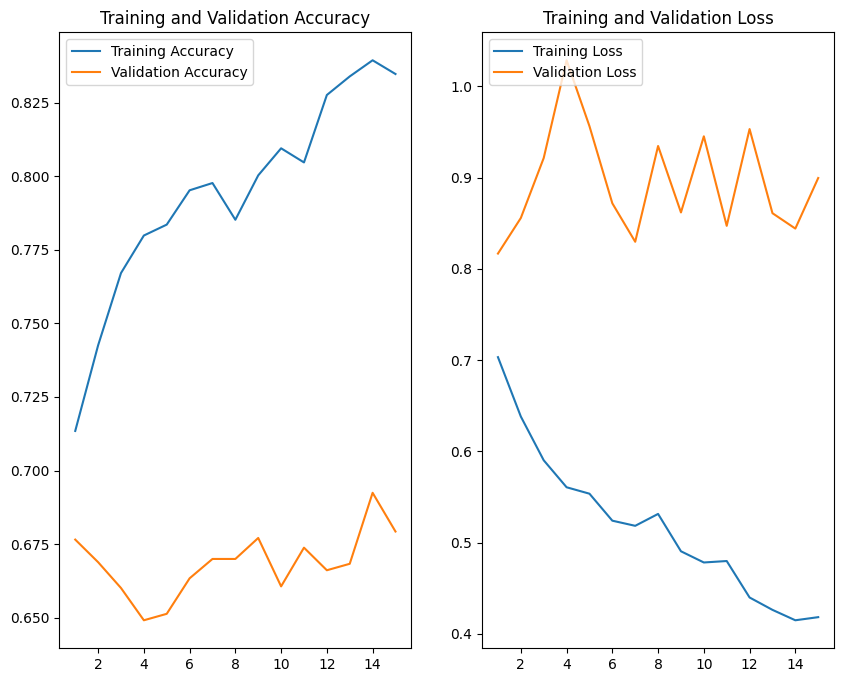

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(1,16),acc,label='Training Accuracy')
plt.plot(range(1,16),val_acc,label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(1,16),loss,label='Training Loss')
plt.plot(range(1,16),val_loss,label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("defungi1.hdf5")

In [ ]:
array=model.predict(test_set)

29/29 [==============================] - 4s 140ms/step


In [ ]:
array=(array== array.max(axis=1)[:,None]).astype(int)

In [ ]:
tuplle=array.shape

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/defungi'
output='output1'
splitfolders.ratio(input_folder,output=output,seed=42,ratio=(0.7,0.2,0.1))

Copying files: 9114 files [00:21, 430.65 files/s]


In [ ]:
test_set_2=test_datagen.flow_from_directory('/content/output1/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 918 images belonging to 5 classes.


In [ ]:
array=model.predict(test_set_2)

29/29 [==============================] - 4s 121ms/step


In [ ]:
array=(array==array.max(axis=1)[:,None]).astype(int)

In [ ]:
print(array)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]
